In [1]:
!pip install vaderSentiment
!pip install imbalanced-learn
!pip install plotly
!pip install nltk
!pip install pandas matplotlib wordcloud


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:




import pandas as pd
import numpy as np




import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('punkt')

nltk.download('stopwords') 










[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\herma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\herma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("data/7817_1.csv")

# Viewing dataset
df.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,manufacturer,manufacturerNumber,name,prices,reviews.date,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,Amazon,NaN,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2015-08-08T00:00:00.000Z,NaN,139.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,Amazon,NaN,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2015-09-01T00:00:00.000Z,NaN,126.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,Amazon,NaN,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2015-07-20T00:00:00.000Z,NaN,69.0,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,Amazon,NaN,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2017-06-16T00:00:00.000Z,NaN,2.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,Amazon,NaN,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2016-08-11T00:00:00.000Z,NaN,17.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


In [4]:
df.info()
data = df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1597 non-null   object 
 1   asins                 1597 non-null   object 
 2   brand                 1597 non-null   object 
 3   categories            1597 non-null   object 
 4   colors                774 non-null    object 
 5   dateAdded             1597 non-null   object 
 6   dateUpdated           1597 non-null   object 
 7   dimension             565 non-null    object 
 8   ean                   898 non-null    float64
 9   keys                  1597 non-null   object 
 10  manufacturer          965 non-null    object 
 11  manufacturerNumber    902 non-null    object 
 12  name                  1597 non-null   object 
 13  prices                1597 non-null   object 
 14  reviews.date          1217 non-null   object 
 15  reviews.doRecommend  

In [5]:
print("Checking for missing values in each column:")
print(df.isnull().sum())

Checking for missing values in each column:
id                         0
asins                      0
brand                      0
categories                 0
colors                   823
dateAdded                  0
dateUpdated                0
dimension               1032
ean                      699
keys                       0
manufacturer             632
manufacturerNumber       695
name                       0
prices                     0
reviews.date             380
reviews.doRecommend     1058
reviews.numHelpful       697
reviews.rating           420
reviews.sourceURLs         0
reviews.text               0
reviews.title             17
reviews.userCity        1597
reviews.userProvince    1597
reviews.username          17
sizes                   1597
upc                      699
weight                   911
dtype: int64


In [6]:
# Handle NaN value
print(df.columns)
df['reviews.numHelpful'] = df['reviews.numHelpful'].fillna(0)

# Removing col with NaN
df = df.dropna(axis=1)

# Check left columns
print("Remaining columns after removing columns with NaN:")
print(df.isnull().sum())

Index(['id', 'asins', 'brand', 'categories', 'colors', 'dateAdded',
       'dateUpdated', 'dimension', 'ean', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'prices', 'reviews.date',
       'reviews.doRecommend', 'reviews.numHelpful', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'sizes',
       'upc', 'weight'],
      dtype='object')
Remaining columns after removing columns with NaN:
id                    0
asins                 0
brand                 0
categories            0
dateAdded             0
dateUpdated           0
keys                  0
name                  0
prices                0
reviews.numHelpful    0
reviews.sourceURLs    0
reviews.text          0
dtype: int64


In [7]:

# %%time

import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


nltk.download('punkt')  
nltk.download('stopwords')  
nltk.download('all')


#  Porter stemmer and load English stopwords
stemmer = PorterStemmer()

# English stopwords for efficient lookup
stop_words = set(stopwords.words('english'))  

# Text cleanup by removing URLs, handles, and punctuation
def clean_text(text):
    if isinstance(text, str):
        # lowercase conversion
        text = text.lower()

        # Remove URLs (http, https, and www links)
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

        # Remove markdown-style links [text](link)
        text = re.sub(r'\[.*?\]\(.*?\)', '', text)

        # Remove handles (@username mentions)
        text = re.sub(r'@\w+', '', text)

        # Remove punctuation and special characters
        text = text.translate(str.maketrans('', '', string.punctuation))

        return text
    else:
        return text

# tokenization
def tokenize_text(text):
    if isinstance(text, str):
        return word_tokenize(text)
    else:
        return text

# remove stopword from tokenized words
def remove_stopwords(tokens):
    if isinstance(tokens, list):
        return [word for word in tokens if word not in stop_words]
    else:
        return tokens

# apply stemming to the tokens
def stem_tokens(tokens):
    if isinstance(tokens, list):
        return [stemmer.stem(token) for token in tokens]
    else:
        return tokens


# text cleanup
df['Cleaned_Review'] = df['reviews.text'].apply(clean_text)

# Tokenization of cleaned text 
df['Tokenized_Review'] = df['Cleaned_Review'].apply(tokenize_text)

# stemming
df['Stemmed_Review'] = df['Tokenized_Review'].apply(stem_tokens)  

# Remove stopwords from the tokenized text
df['No_Stopwords_Review'] = df['Tokenized_Review'].apply(remove_stopwords)

df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\herma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\herma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\herma\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\herma\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\herma\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_

,id,asins,brand,categories,dateAdded,dateUpdated,keys,name,prices,reviews.numHelpful,reviews.sourceURLs,reviews.text,Cleaned_Review,Tokenized_Review,Stemmed_Review,No_Stopwords_Review
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,kindlepaperwhite/b00qjdu3ky,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",139.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,i initially had trouble deciding between the p...,"[i, initially, had, trouble, deciding, between...","[i, initi, had, troubl, decid, between, the, p...","[initially, trouble, deciding, paperwhite, voy..."
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,kindlepaperwhite/b00qjdu3ky,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",126.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,allow me to preface this with a little history...,"[allow, me, to, preface, this, with, a, little...","[allow, me, to, prefac, thi, with, a, littl, h...","[allow, preface, little, history, casual, read..."
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,kindlepaperwhite/b00qjdu3ky,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",69.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,i am enjoying it so far great for reading had ...,"[i, am, enjoying, it, so, far, great, for, rea...","[i, am, enjoy, it, so, far, great, for, read, ...","[enjoying, far, great, reading, original, fire..."
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,kindlepaperwhite/b00qjdu3ky,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,i bought one of the first paperwhites and have...,"[i, bought, one, of, the, first, paperwhites, ...","[i, bought, one, of, the, first, paperwhit, an...","[bought, one, first, paperwhites, pleased, con..."
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,kindlepaperwhite/b00qjdu3ky,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",17.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,i have to say upfront i dont like coroporate ...,"[i, have, to, say, upfront, i, dont, like, cor...","[i, have, to, say, upfront, i, dont, like, cor...","[say, upfront, dont, like, coroporate, hermeti..."


In [8]:
from scipy.stats import pearsonr, spearmanr
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt





analyzer = SentimentIntensityAnalyzer()


# 'compound', 'positive', 'negative', and 'neutral' sentiment values.
def get_sentiment(review):
    return analyzer.polarity_scores(review)

df['vader_scores'] = df['Cleaned_Review'].apply(get_sentiment)

df['compound'] = df['vader_scores'].apply(lambda score_dict: score_dict['compound'])

def classify_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['compound'].apply(classify_sentiment)


print(df[['Cleaned_Review', 'compound', 'sentiment']].head(10))


#Correlation
pearson_corr, pearson_p = pearsonr(df['compound'], df['reviews.numHelpful'])
print(f"Pearson correlation: {pearson_corr:.3f}, p-value: {pearson_p:.3f}")





                                      Cleaned_Review  compound sentiment
0  i initially had trouble deciding between the p...    0.9879  Positive
1  allow me to preface this with a little history...    0.9881  Positive
2  i am enjoying it so far great for reading had ...    0.4364  Positive
3  i bought one of the first paperwhites and have...    0.9746  Positive
4  i have to say upfront  i dont like coroporate ...    0.9980  Positive
5  my previous kindle was a dx this is my second ...    0.2627  Positive
6  allow me to preface this with a little history...    0.9881  Positive
7  just got mine right now looks the same as the ...    0.9205  Positive
8  i initially had trouble deciding between the p...    0.9879  Positive
9  i am enjoying it so far great for reading had ...    0.4364  Positive
Pearson correlation: 0.060, p-value: 0.017


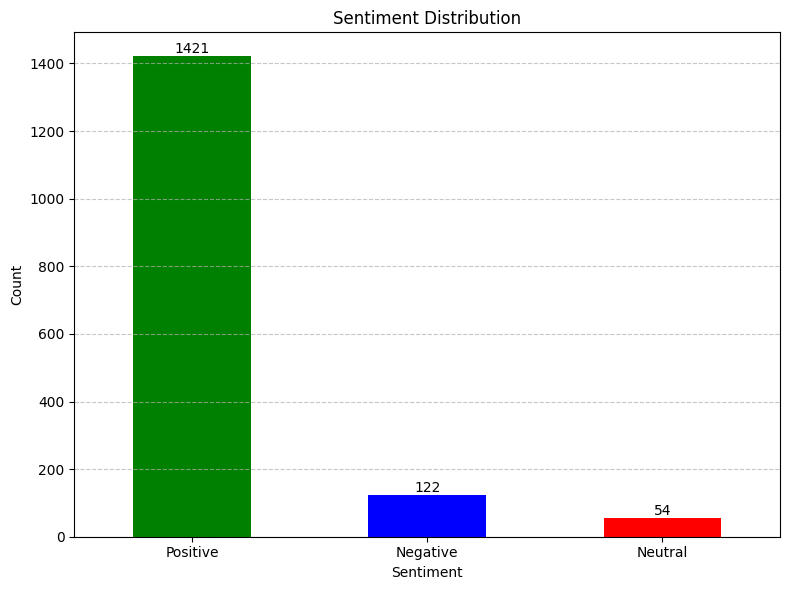

In [9]:
#Visualization

# Counting the number of each sentiment
sentiment_counts = df['sentiment'].value_counts()

# bar chart
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# label
for index, value in enumerate(sentiment_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

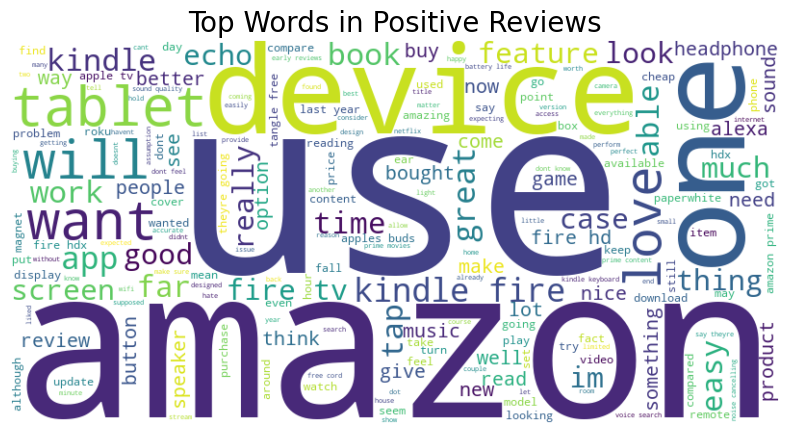

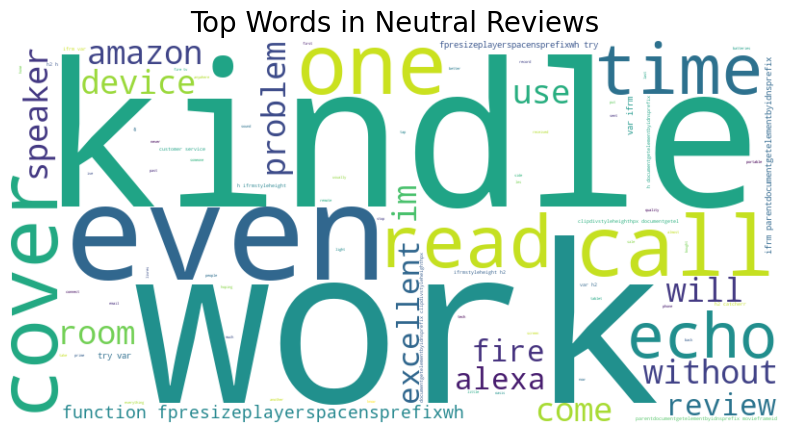

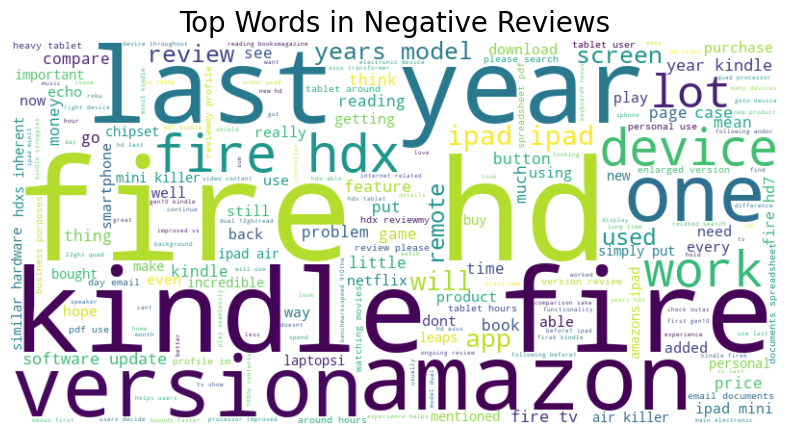

In [10]:
#Wordcloud
import pandas as pd
from wordcloud import WordCloud


sentiments = ['Positive', 'Neutral', 'Negative']
for sentiment in sentiments:
    text = " ".join(review for review in df[df['sentiment'] == sentiment]['Cleaned_Review'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Top Words in {sentiment} Reviews', fontsize=20)
    plt.axis('off')
    plt.show()

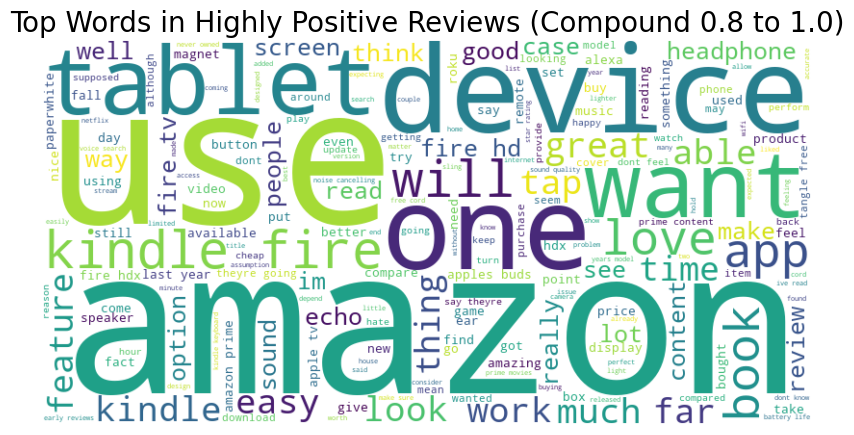

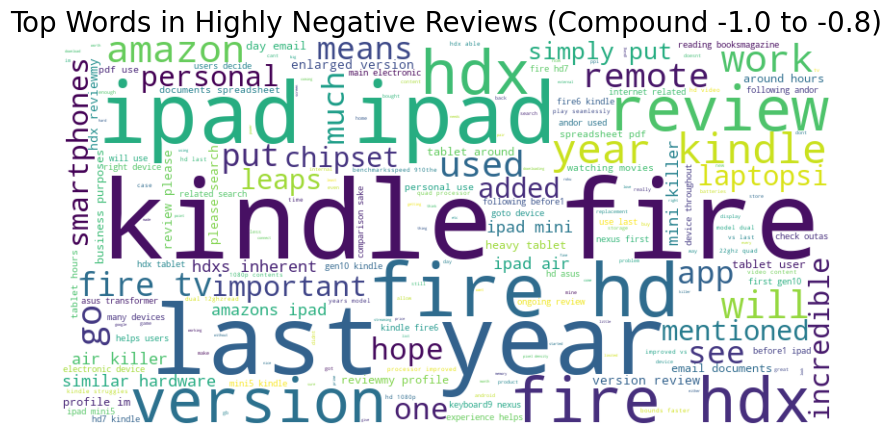

In [11]:
# Filter for highly positive reviews
positive_reviews = df[(df['compound'] > 0.8) & (df['compound'] <= 1.0)]

# Filter for highly negative reviews
negative_reviews = df[(df['compound'] >= -1.0) & (df['compound'] < -0.8)]

# Combine all positive reviews into a single string
positive_text = " ".join(review for review in positive_reviews['Cleaned_Review'].dropna().astype(str))

# Combine all negative reviews into a single string
negative_text = " ".join(review for review in negative_reviews['Cleaned_Review'].dropna().astype(str))


#  generate and display a word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

# word cloud for highly positive reviews
generate_wordcloud(positive_text, 'Top Words in Highly Positive Reviews (Compound 0.8 to 1.0)')

# word cloud for highly negative reviews
generate_wordcloud(negative_text, 'Top Words in Highly Negative Reviews (Compound -1.0 to -0.8)')

C:\Users\herma\AppData\Local\Temp\ipykernel_48444\769722486.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='compound', data=df, palette='coolwarm')


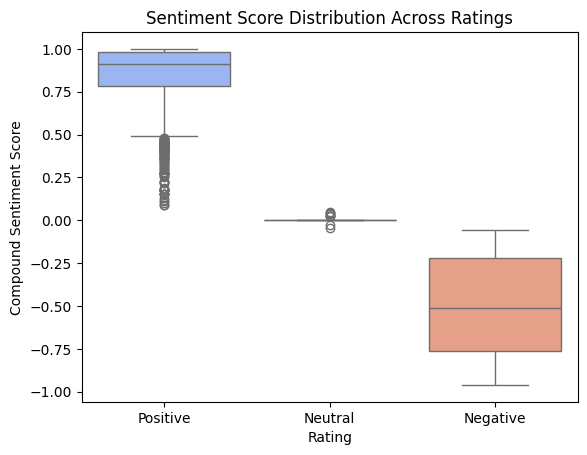

In [26]:
import seaborn as sns
sns.boxplot(x='sentiment', y='compound', data=df, palette='coolwarm')
plt.title('Sentiment Score Distribution Across Ratings')
plt.xlabel('Rating')
plt.ylabel('Compound Sentiment Score')
plt.show()

C:\Users\herma\AppData\Local\Temp\ipykernel_48444\3116823314.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='Review_Length', data=df, palette='magma')


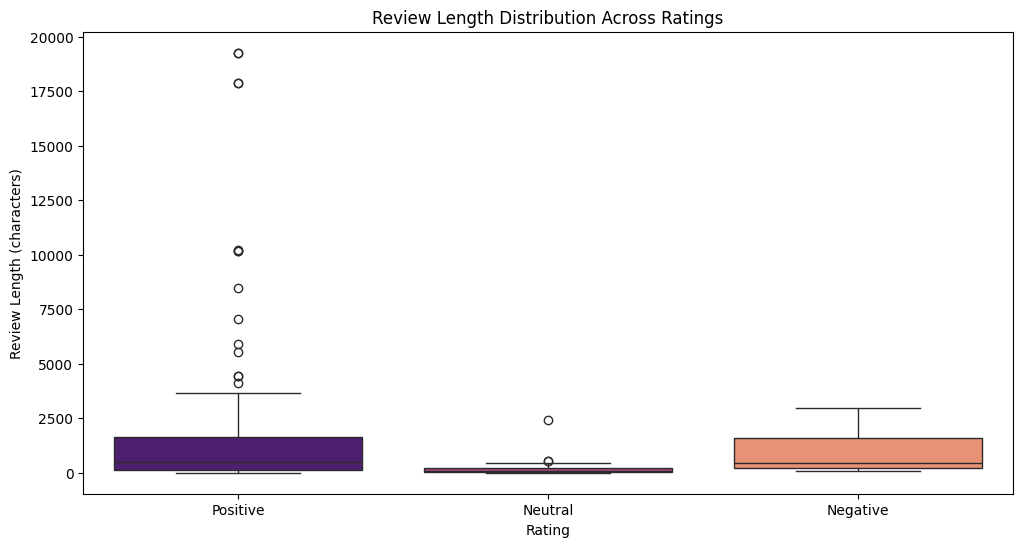

In [30]:
df['Review_Length'] = df['Cleaned_Review'].apply(len)

plt.figure(figsize=(12, 6))
sns.boxplot(x='sentiment', y='Review_Length', data=df, palette='magma')
plt.title('Review Length Distribution Across Ratings')
plt.xlabel('Rating')
plt.ylabel('Review Length (characters)')
plt.show()

Number of missing 'amountMin' entries: 0


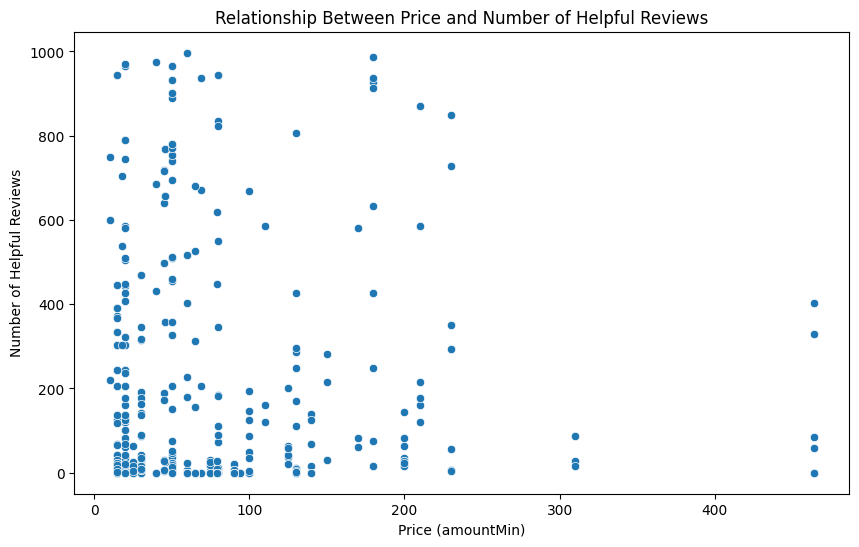

Pearson correlation coefficient: -0.086
P-value: 0.001


In [ ]:
import json

#  parse JSON strings and handle lists
def parse_price(price_str):
    try:
        parsed = json.loads(price_str)
        if isinstance(parsed, list):
            
            return parsed[0] if parsed else None
        return parsed
    except (TypeError, json.JSONDecodeError):
        return None
    

df['Price_Dict'] = df['prices'].apply(parse_price)


df['amountMin'] = df['Price_Dict'].apply(lambda x: x['amountMin'] if isinstance(x, dict) and 'amountMin' in x else None)


df['amountMin'] = pd.to_numeric(df['amountMin'], errors='coerce')

# Check for missing values in 'amountMin'
missing_amount_min = df['amountMin'].isnull().sum()
print(f"Number of missing 'amountMin' entries: {missing_amount_min}")

#drop rows with missing 'amountMin'
df = df.dropna(subset=['amountMin'])


plt.figure(figsize=(10, 6))
sns.scatterplot(x='amountMin', y='reviews.numHelpful', data=df)
plt.title('Relationship Between Price and Number of Helpful Reviews')
plt.xlabel('Price (amountMin)')
plt.ylabel('Number of Helpful Reviews')
plt.show()




